In [3]:
# load necessary libraries
library(DBI)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)
library(ggplot2) 
library(forecast)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: magrittr

Attaching package: ‘forecast’

The following object is masked from ‘package:ggpubr’:

    gghistogram

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [4]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

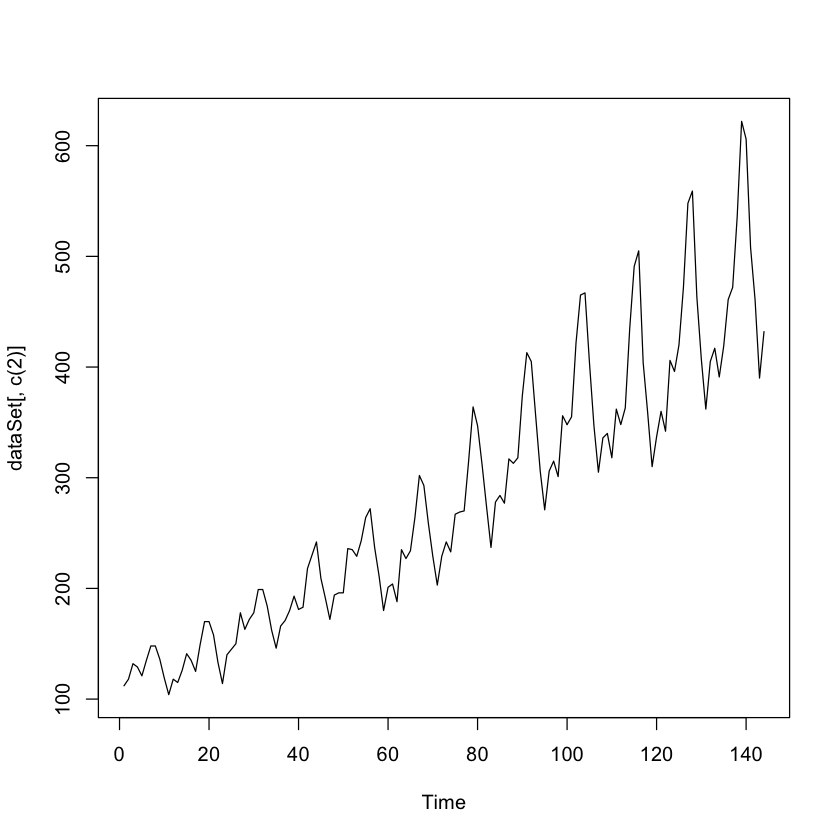

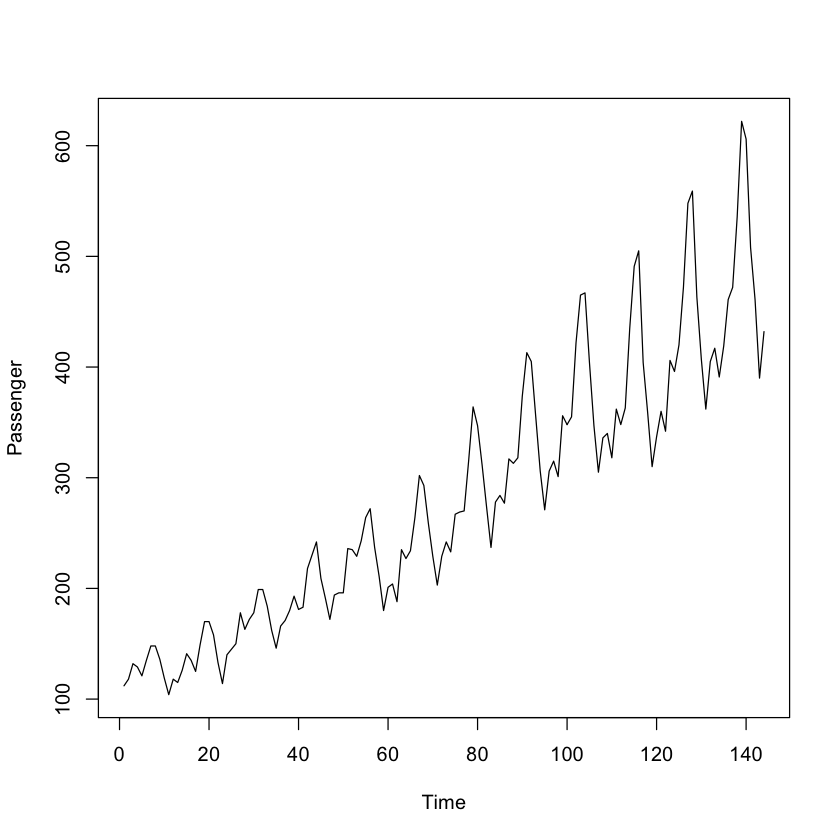

In [5]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [6]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])

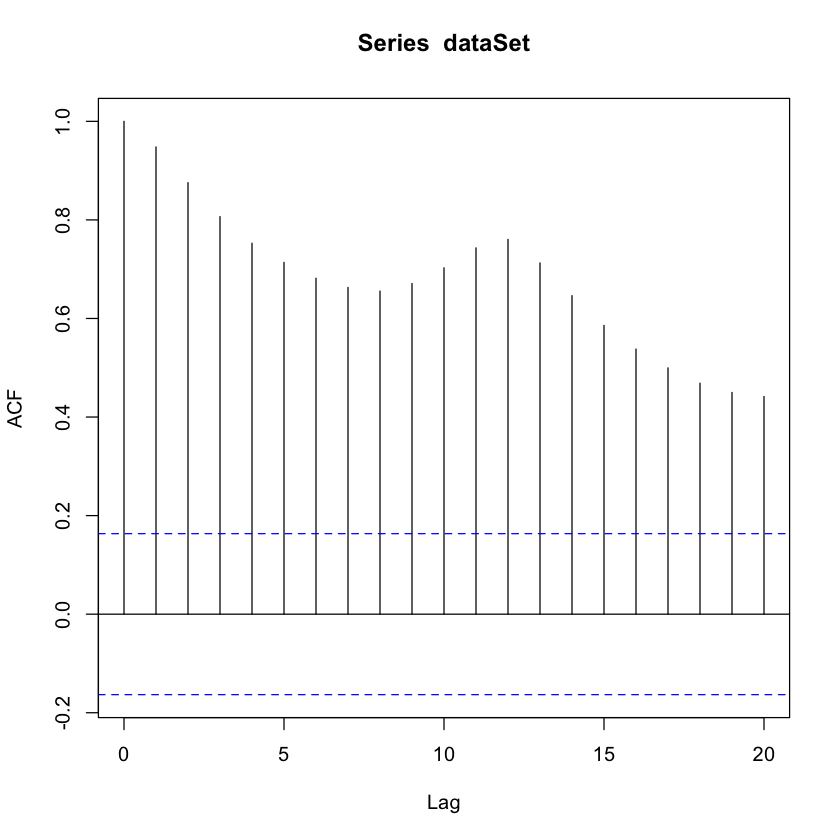

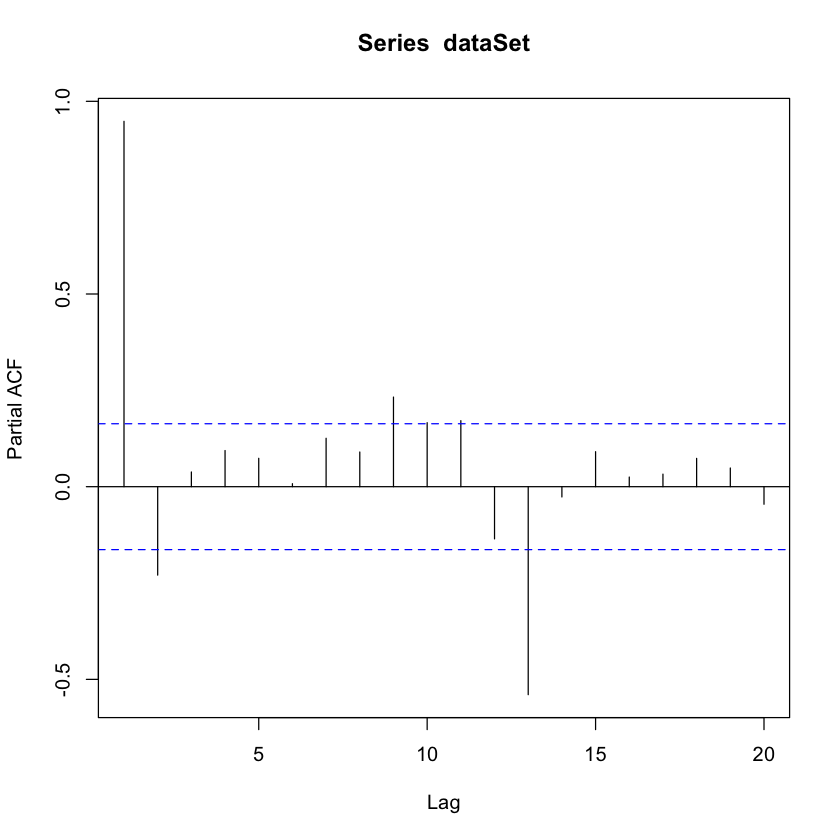

In [7]:
# Finding Auto-correlation in the series for selecting a Candidate ARIMA model 
# Using ACF()
acf(dataSet, lag.max=20)   

# Finding Partial Auto-correlation in the series for selecting a Candidate ARIMA model 
# Using PACF()
pacf(dataSet, lag.max=20)  


	Ljung-Box test

data:  Residuals from ARIMA(4,1,3)
Q* = 13.936, df = 3, p-value = 0.002993

Model df: 8.   Total lags used: 11

[1] 0.9529874


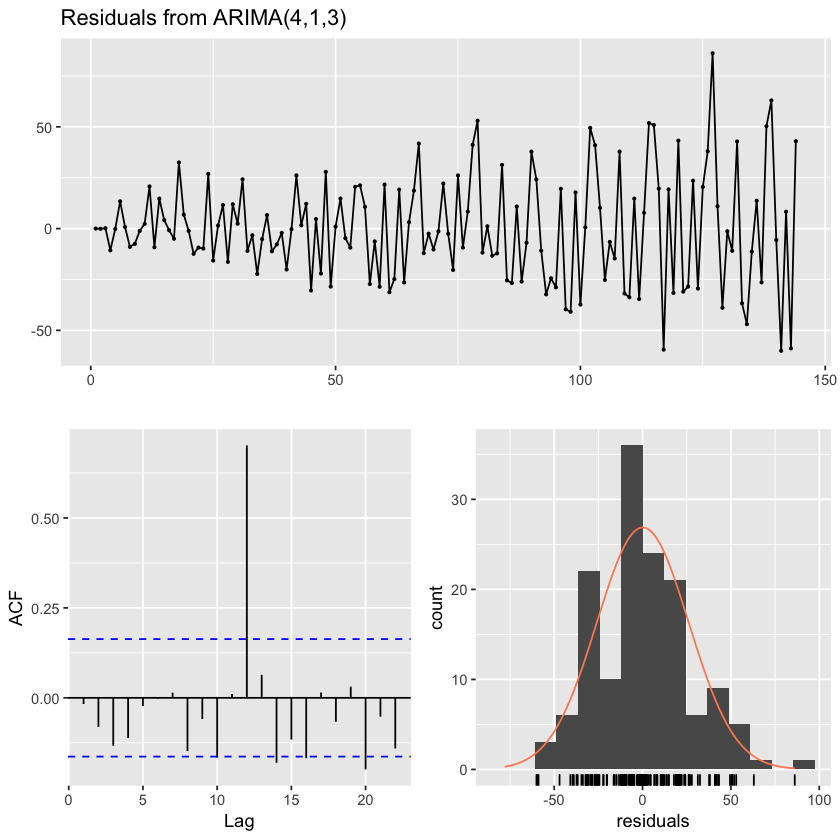

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
145       506.9957 473.0469 540.9445 455.0754 558.9160
146       543.4818 490.6510 596.3125 462.6842 624.2794
147       593.9146 534.2526 653.5767 502.6695 685.1598
148       593.8695 531.2123 656.5267 498.0436 689.6955
149       587.1914 524.4954 649.8873 491.3062 683.0766
150       566.6571 503.9937 629.3204 470.8217 662.4924
151       550.2530 487.6170 612.8890 454.4595 646.0465
152       545.4593 482.3409 608.5777 448.9280 641.9906
153       551.0224 485.4586 616.5862 450.7512 651.2936
154       566.3234 495.7687 636.8781 458.4193 674.2275
155       583.7436 506.4288 661.0585 465.5008 701.9865
156       599.3153 515.0943 683.5363 470.5104 728.1201
157       609.6627 519.2077 700.1177 471.3237 748.0016
158       614.7026 518.8146 710.5905 468.0545 761.3506
159       616.3452 515.4348 717.2556 462.0160 770.6743
160       617.0969 511.0388 723.1550 454.8950 779.2987
161       619.2828 507.4756 731.0900 448.2885 790.2772
162       

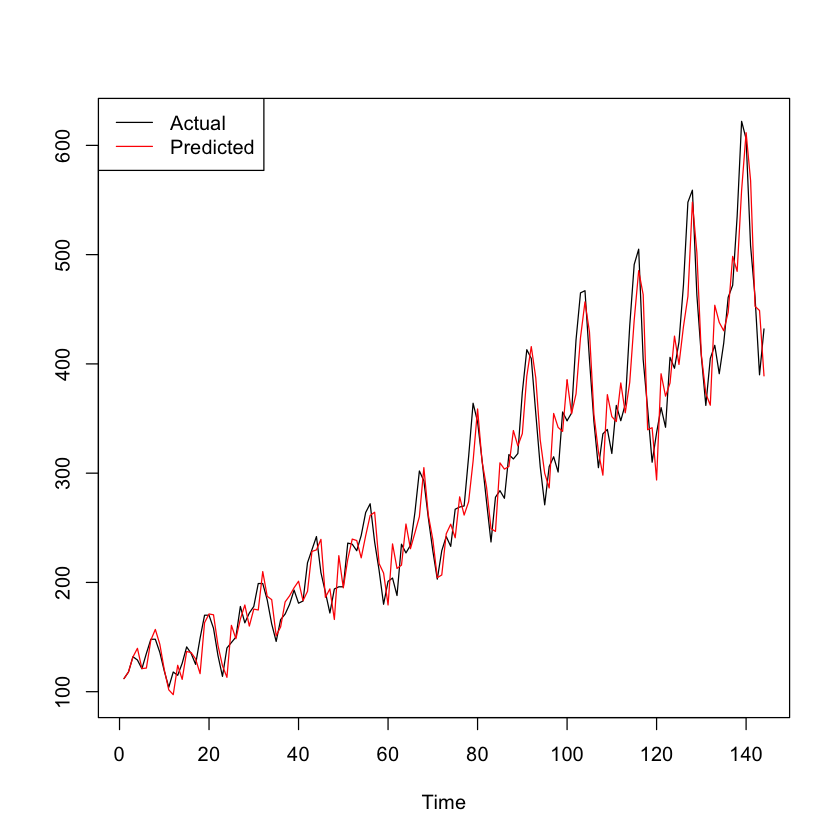

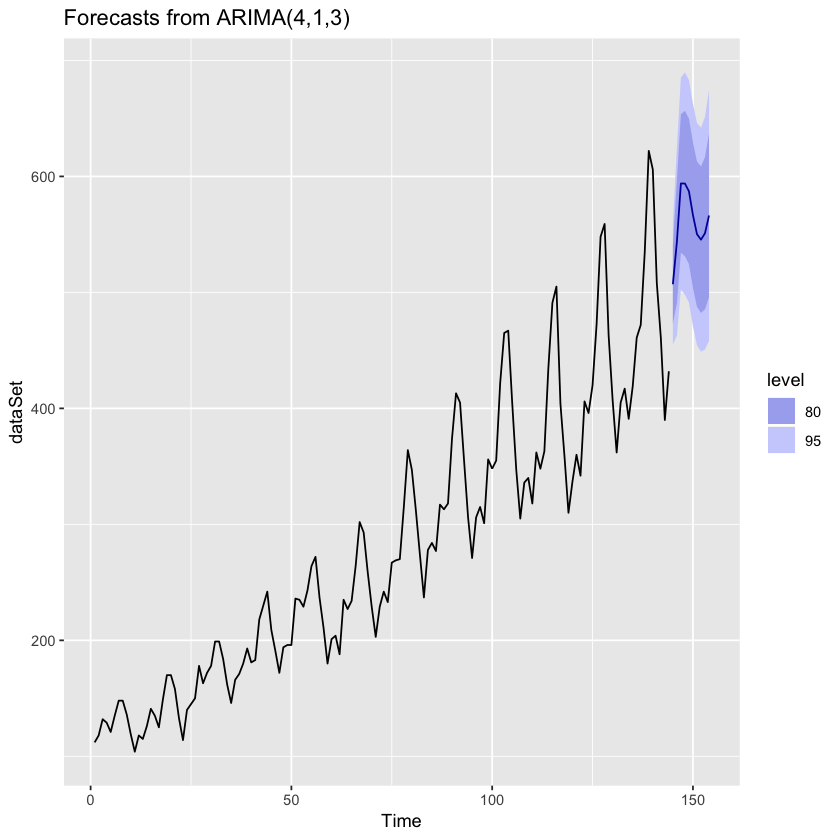

In [8]:
# ARIMA Model with seasonality
fit_arima  <- arima(dataSet,  order = c(4,1,3), seasonal = c(0,2,1)); 
checkresiduals(fit_arima) 

# Calculate R squared value : r2
r2 <- cor(fitted(fit_arima),  dataSet)^2;  print(r2)

x <- dataSet            # actual
y <- fitted(fit_arima)  # predicted
# plot actual vs predicted
ts.plot(x, y, 
        gpars = list(col = c("black", "red")))
legend("topleft", legend = c("Actual", "Predicted"), col = c("black", "red"), lty = 1)

# Plotting Observed and Predicted with CI
forecast <- forecast:::forecast.Arima(fit_arima, h = 25)
print(forecast); autoplot(forecast(fit_arima))